# Hotel Reservations Classification Dataset

This notebook shows data regarding hotel reservations. The goal is to determine whether the guest will honor the reservation ot not.

The data is from this link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [17]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from tqdm.auto import  tqdm
import seaborn as sns

## Understanding the data

The dataset consists of 36,275 samples and 19 features:

1. Booking_ID - unique identifier of each booking
2. no_of_adults - number of adults
3. no_of_children - number of children
4. no_of_weekend - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. no_of_week_nights - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. type_of_meal_plan  - Type of meal plan booked by the customer
7. required_car_parking_space - Does the customer require a car parking space?
8. room_type_reserved - room_type_reserved
9. lead_time - Number of days between the date of booking and the arrival date
10. arrival_year - Year of arrival date
11. arrival_month - Month of arrival date
12. arrival_date - Date of the month
13. market_segment_type - Market segment designation
14. repeated_guest - Is the customer a repeated guest?
15. no_of_previous_cancellations - Number of previous bookings that were canceled by the customer prior to the current booking
16. no_of_previous_bookings_not_canceled - Number of previous bookings not canceled by the customer prior to the current booking
17. avg_price_per_room - Average price per day of the reservation; prices of the rooms are dynamic
18. no_of_special_requests - Total number of special requests made by the customer
19. booking_status - Flag indicating if the booking was canceled or not

There are 13 int features, 5 string features and 1 decimal.

In [33]:
# download the dataset
df = pd.read_csv("Hotel Reservations.csv")
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [3]:
# Check if data is balanced
df["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<AxesSubplot:>

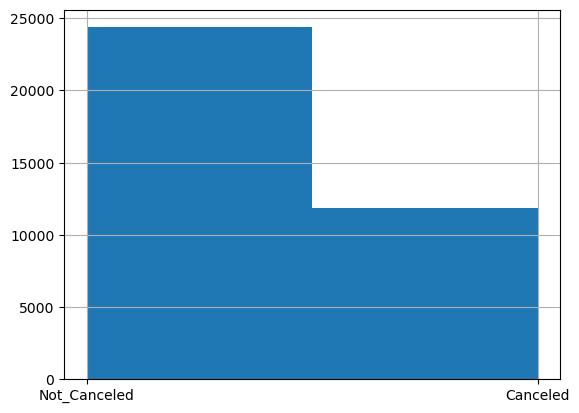

In [14]:
df["booking_status"].hist(bins = 2)

In [15]:
## missing values
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

The data has no missing values, we can keep going

In [34]:
type_of_meal_plan = pd.get_dummies(df["type_of_meal_plan"])
room_type_reserved = pd.get_dummies(df["room_type_reserved"])
market_segment_type = pd.get_dummies(df["market_segment_type"])
booking_staus = pd.get_dummies(df["booking_status"])
df = pd.concat([df, type_of_meal_plan, room_type_reserved, market_segment_type, booking_staus], axis = "columns")
df = df.drop(columns = ["type_of_meal_plan", "room_type_reserved", "Offline", "Not_Canceled", "booking_status", "market_segment_type"])
df.head(4)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Online,Canceled
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,0,0,0,0,0,0,0,0,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,0,0,0,0,0,1,0
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,0,0,0,0,0,0,0,1,1
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,0,0,0,0,0,0,0,1,1


In [38]:
df.rename({"Online": "market_segment_type",
           "Canceled": "booking_status"}, axis = 1, inplace = True)
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,market_segment_type,booking_status
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,0,0,0,0,0,0,0,0,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,0,0,0,0,0,1,0
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,0,0,0,0,0,0,0,1,1
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,0,0,0,0,0,0,0,1,1
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:>

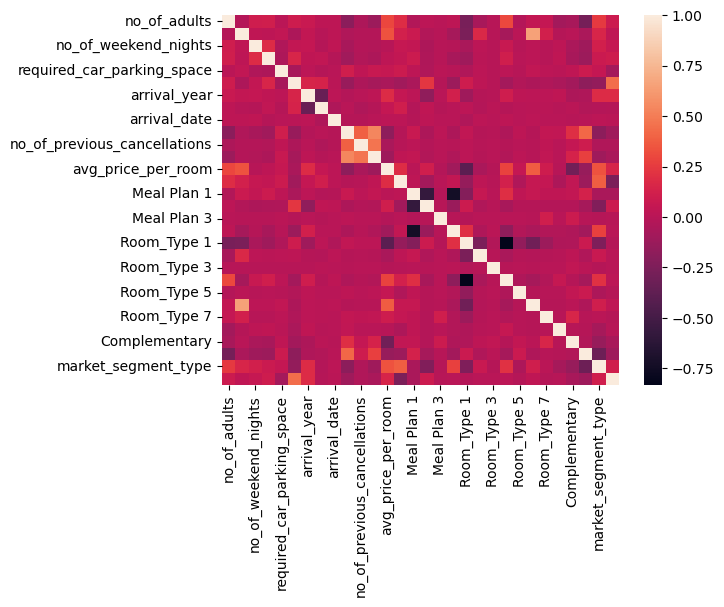

In [45]:
figsize = (20, 20)
sns.heatmap(df.drop(columns = ["Booking_ID"]).corr())

## Start modelling experiments

I will run a few experiments on the data:
1. Logistic regression
2. Decision tree
3. Random forest
4. SVM
5. Multi-layer perceptron
6. XGBoost

In [78]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["booking_status", "Booking_ID"])
y = df["booking_status"]
X.shape, y.shape

((36275, 29), (36275,))

In [79]:
X.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,market_segment_type
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: uint8

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30833, 29), (5442, 29), (30833,), (5442,))

In [82]:
from sklearn.linear_model import LogisticRegression
model_0 = LogisticRegression(random_state = 42, max_iter = 500)
model_0.fit(X_train, y_train)
preds_0 = model_0.predict(X_test)
# Use score method to get accuracy of model
model_0_score = model_0.score(X_test, y_test)
print(model_0_score)

0.8031973539140022


C:\Users\jvjos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(random_state = 42)
model_1.fit(X_train, y_train)
preds_1 = model_1.predict(X_test)

model_1_score = model_1.score(X_test, y_test)
print(model_1_score)

0.8781697905181919


In [84]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(random_state = 42)
model_2.fit(X_train, y_train)
preds_2 = model_2.predict(X_test)

model_2_score = model_2.score(X_test, y_test)
print(model_2_score)

0.9046306504961411


In [85]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,market_segment_type
26071,2,0,2,2,0,38,2018,9,10,0,...,0,0,0,0,0,0,0,0,0,0
10448,2,0,0,4,0,62,2018,4,5,0,...,0,0,0,0,0,0,0,0,0,1
20109,2,0,2,2,0,134,2017,12,4,0,...,0,0,0,0,0,0,0,0,0,0
16177,2,0,2,5,0,6,2017,9,20,0,...,0,0,0,0,0,0,0,0,0,1
17708,2,1,2,0,0,9,2018,1,17,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feat2scale = ["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time", "arrival_year", "arrival_month", "arrival_date", "avg_price_per_room", "no_of_special_requests", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled"]
temp = pd.DataFrame(ss.fit_transform(X.loc[:, feat2scale]), columns = feat2scale).reset_index(drop = True)
X_scaled = X.drop(feat2scale, axis = 1).reset_index(drop  = True)
X_scaled = pd.concat([X_scaled, temp], axis = 1)
y_scaled = y.reset_index(drop = True)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape, y_train_scaled.shape, y_test_scaled.shape

((30833, 29), (5442, 29), (30833,), (5442,))

In [106]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_3 = SVC(random_state = 42)
model_3.fit(X_train_scaled, y_train_scaled)
preds_3 = model_3.predict(X_test_scaled)

model_3_score = model_3.score(X_test_scaled, y_test_scaled)
print(model_3_score)

0.8460124954061007


In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
model_4 = xgb.XGBClassifier()
model_4.fit(X_train, y_train)
preds_4 = model_4.predict(X_test)

model_4_score = sum(preds_4 == y_test)/len(y_test)
model_4_score_sk = accuracy_score(y_test, preds_4)
print(model_4_score, model_4_score_sk)

0.8945240720323411 0.8945240720323411


In [107]:
from sklearn.neural_network import MLPClassifier
model_5 = MLPClassifier(random_state = 42, max_iter = 400)
model_5.fit(X_train_scaled, y_train_scaled)
preds_5 = model_5.predict(X_test_scaled)

model_5_score = model_5.score(X_test_scaled, y_test_scaled)
print(model_5_score)

0.8596104373392135


## Optimization

The random forest predicted best on the test set, but now I want to see if I can tune its hyperparameters.

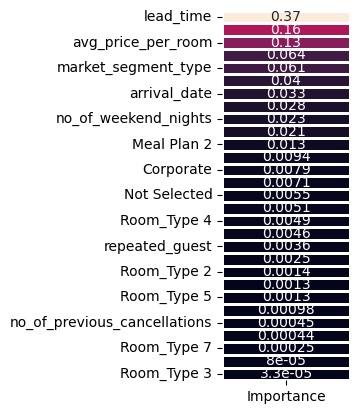

In [113]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 42)
estimators = {"n_estimators": np.arange(50, 201, 50), "max_depth": np.arange(8, 16),
              "min_samples_split": [50, 100, 150]}
gs_rf = GridSearchCV(estimator = rf, param_grid = estimators, scoring = ['roc_auc', 'accuracy', 'f1'], refit = 'accuracy', cv = 5)
gs_rf.fit(X_train, y_train)
res_rg = pd.DataFrame(gs_rf.cv_results_)[['params', 'mean_test_roc_auc', 'mean_test_accuracy', 'mean_test_f1']].sort_values('mean_test_accuracy', ascending=False)
best_est_rf = gs_rf.best_estimator_
FI_rf = pd.DataFrame(best_est_rf.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
sns.heatmap(FI_rf, annot=True, cbar=False, linewidths=1)
plt.subplots_adjust(left=0.5, right=0.7)

In [115]:
res_rg.head(), best_est_rf

(                                               params  mean_test_roc_auc  \
 87  {'max_depth': 15, 'min_samples_split': 50, 'n_...           0.936849   
 86  {'max_depth': 15, 'min_samples_split': 50, 'n_...           0.936609   
 85  {'max_depth': 15, 'min_samples_split': 50, 'n_...           0.936436   
 73  {'max_depth': 14, 'min_samples_split': 50, 'n_...           0.934968   
 84  {'max_depth': 15, 'min_samples_split': 50, 'n_...           0.935737   
 
     mean_test_accuracy  mean_test_f1  
 87            0.881685      0.805496  
 86            0.881426      0.805149  
 85            0.881296      0.804704  
 73            0.880420      0.802996  
 84            0.880291      0.803895  ,
 RandomForestClassifier(max_depth=15, min_samples_split=50, n_estimators=200,
                        random_state=42))

In [116]:
best_rf = RandomForestClassifier(max_depth = 15, min_samples_split = 50, n_estimators = 200, random_state = 42)
best_rf.fit(X_train, y_train)
preds = best_rf.predict(X_test)

best_rf_score = best_rf.score(X_test, y_test)
print(best_rf_score)

0.880374862183021
